In [1]:
####TERRY CODE STARTS######

In [454]:
# Import Dependencies


import numpy as py
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [455]:
# Import OS Module
import os

In [456]:
# Import Module for reading CSV files
import csv

In [457]:
# Create a file path for Indices as a variable
Incidences = Path("Resources/Terry_LongTermIncidenceRate.csv")

In [458]:
# Read Data File with Pandas Library
Incidences_df = pd.read_csv(Incidences)
Incidences_df.head()

,Unnamed: 0,Both Sexes,Unnamed: 2,Unnamed: 3,Unnamed: 4,Female,Unnamed: 6,Unnamed: 7,Unnamed: 8,Male,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Year of Diagnosis,"Rate per 100,000",Lower 95% C.I.,Upper 95% C.I.,Modeled Rate (Trend Line),"Rate per 100,000",Lower 95% C.I.,Upper 95% C.I.,Modeled Rate (Trend Line),"Rate per 100,000",Lower 95% C.I.,Upper 95% C.I.,Modeled Rate (Trend Line)
1,1975,8.8,8.3,9.3,8.6,8.3,7.7,9,8.9,9.5,8.7,10.3,9.2
2,1976,8.8,8.3,9.4,9,8.3,7.7,9,9.1,9.4,8.7,10.2,9.7
3,1977,9.6,9.1,10.2,9.5,8.9,8.3,9.6,9.3,10.6,9.8,11.4,10.2
4,1978,9.6,9.1,10.2,9.9,9.5,8.8,10.2,9.5,10.1,9.3,11,10.7


In [459]:
# Clean up and Organize the Data

# Change the Header
Incidences = Path("Resources/Terry_LongTermIncidenceRate.csv")
Incidences_df = pd.read_csv(Incidences, skiprows=1)
Incidences_df.head()

,Year of Diagnosis,"Rate per 100,000",Lower 95% C.I.,Upper 95% C.I.,Modeled Rate (Trend Line),"Rate per 100,000.1",Lower 95% C.I..1,Upper 95% C.I..1,Modeled Rate (Trend Line).1,"Rate per 100,000.2",Lower 95% C.I..2,Upper 95% C.I..2,Modeled Rate (Trend Line).2
0,1975,8.8,8.3,9.3,8.6,8.3,7.7,9.0,8.9,9.5,8.7,10.3,9.2
1,1976,8.8,8.3,9.4,9,8.3,7.7,9.0,9.1,9.4,8.7,10.2,9.7
2,1977,9.6,9.1,10.2,9.5,8.9,8.3,9.6,9.3,10.6,9.8,11.4,10.2
3,1978,9.6,9.1,10.2,9.9,9.5,8.8,10.2,9.5,10.1,9.3,11.0,10.7
4,1979,10.2,9.7,10.7,10.5,9.7,9.0,10.4,9.8,11.1,10.3,11.9,11.3


In [460]:
# Get a list of all of the columns for reference
Incidences_df.columns

Index(['Year of Diagnosis', 'Rate per 100,000', 'Lower 95% C.I.',
       'Upper 95% C.I.', 'Modeled Rate (Trend Line)', 'Rate per 100,000.1',
       'Lower 95% C.I..1', 'Upper 95% C.I..1', 'Modeled Rate (Trend Line).1',
       'Rate per 100,000.2', 'Lower 95% C.I..2', 'Upper 95% C.I..2',
       'Modeled Rate (Trend Line).2'],
      dtype='object')

In [461]:
# Reduce the Columns
reduced_Incidences_df = Incidences_df.loc[:, ["Year of Diagnosis", "Rate per 100,000", "Lower 95% C.I.",
                                    "Upper 95% C.I.", "Rate per 100,000.1", "Lower 95% C.I..1", "Upper 95% C.I..1", "Rate per 100,000.2", "Lower 95% C.I..2","Upper 95% C.I..2"]]
reduced_Incidences_df.head()

,Year of Diagnosis,"Rate per 100,000",Lower 95% C.I.,Upper 95% C.I.,"Rate per 100,000.1",Lower 95% C.I..1,Upper 95% C.I..1,"Rate per 100,000.2",Lower 95% C.I..2,Upper 95% C.I..2
0,1975,8.8,8.3,9.3,8.3,7.7,9.0,9.5,8.7,10.3
1,1976,8.8,8.3,9.4,8.3,7.7,9.0,9.4,8.7,10.2
2,1977,9.6,9.1,10.2,8.9,8.3,9.6,10.6,9.8,11.4
3,1978,9.6,9.1,10.2,9.5,8.8,10.2,10.1,9.3,11.0
4,1979,10.2,9.7,10.7,9.7,9.0,10.4,11.1,10.3,11.9


In [462]:
# Rename the columns
reduced_Incidences_df.columns


Index(['Year of Diagnosis', 'Rate per 100,000', 'Lower 95% C.I.',
       'Upper 95% C.I.', 'Rate per 100,000.1', 'Lower 95% C.I..1',
       'Upper 95% C.I..1', 'Rate per 100,000.2', 'Lower 95% C.I..2',
       'Upper 95% C.I..2'],
      dtype='object')

In [463]:
column_names = ["Year of Diagnosis", "Both Sexes Rate per 100,000","Both Lower 95% C.I.",
       "Both Upper 95% C.I.", "Female Rate per 100,000", "Female Lower 95% C.I.",
       "Female Upper 95% C.I.", "Male Rate per 100,000", "Male Lower 95% C.I.",
       "Male Upper 95% C.I."]
reduced_Incidences_df.columns = column_names
reduced_Incidences_df.head()

,Year of Diagnosis,"Both Sexes Rate per 100,000",Both Lower 95% C.I.,Both Upper 95% C.I.,"Female Rate per 100,000",Female Lower 95% C.I.,Female Upper 95% C.I.,"Male Rate per 100,000",Male Lower 95% C.I.,Male Upper 95% C.I.
0,1975,8.8,8.3,9.3,8.3,7.7,9.0,9.5,8.7,10.3
1,1976,8.8,8.3,9.4,8.3,7.7,9.0,9.4,8.7,10.2
2,1977,9.6,9.1,10.2,8.9,8.3,9.6,10.6,9.8,11.4
3,1978,9.6,9.1,10.2,9.5,8.8,10.2,10.1,9.3,11.0
4,1979,10.2,9.7,10.7,9.7,9.0,10.4,11.1,10.3,11.9


In [464]:
# Import Dependencies for Interactive Plots
%matplotlib notebook
%matplotlib inline

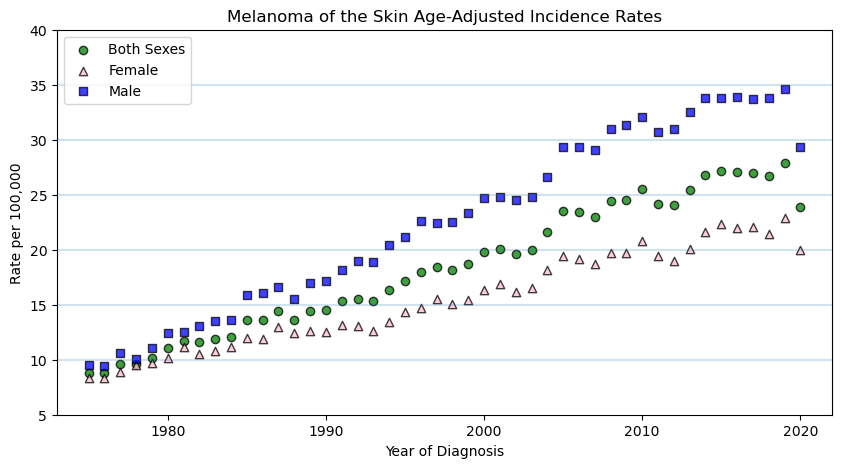

In [465]:
#  Make a Scatter Plot
x_values = reduced_Incidences_df["Year of Diagnosis"]
y_values_both_sexes = reduced_Incidences_df["Both Sexes Rate per 100,000"]
y_values_male = reduced_Incidences_df["Male Rate per 100,000"]
y_values_female = reduced_Incidences_df["Female Rate per 100,000"]
plt.figure(figsize=(10, 5))
plt.scatter(x_values, y_values_both_sexes, marker="o", facecolors="green", edgecolors="black", label="Both Sexes", alpha=0.75)
plt.scatter(x_values, y_values_female, marker="^", facecolors="pink", edgecolors="black", label="Female", alpha=0.75)
plt.scatter(x_values, y_values_male, marker="s", facecolors="blue", edgecolors="black", label="Male", alpha=0.75)
# Create a title, x label, and y label for our chart
plt.title("Melanoma of the Skin Age-Adjusted Incidence Rates")
plt.xlabel("Year of Diagnosis")
plt.ylabel("Rate per 100,000")
plt.legend(loc="best")
plt.xlim(1973,2022)
plt.ylim(5,40)
x_lim = 2022
plt.hlines(35, 1973, x_lim, alpha=0.2)
plt.hlines(30, 1973, x_lim, alpha=0.2)
plt.hlines(25, 1973, x_lim, alpha=0.2)
plt.hlines(20, 1973, x_lim, alpha=0.2)
plt.hlines(15, 1973, x_lim, alpha=0.2)
plt.hlines(10, 1973, x_lim, alpha=0.2)


# Save Image of Melanoma of the Skin Age-Adjusted Incidence Rates scatter plot Chart for Presentation
plt.savefig("Images/Incidences_PyScatter.png")  
plt.show()

In [466]:
print("Several possible reasons for increasing rate of Melanoma over the years. Increased sun exposure, environmental factors, changing demographics, increased awarness / detection, fashion trends, tanning beds, and genetic factors.")

Several possible reasons for increasing rate of Melanoma over the years. Increased sun exposure, environmental factors, changing demographics, increased awarness / detection, fashion trends, tanning beds, and genetic factors.


In [467]:
# Simple Data regarding Melanoma Distribution cases 

In [468]:
# Create a file path for Distribution of cases 
Distribution = Path("Resources/Melanoma_dist_cases.csv")


In [469]:
# Read Distribution data file with Pandas Library

In [470]:
Distribution_df = pd.read_csv(Distribution)
Distribution_df.head()

,Unnamed: 0,Percent of cases
0,Localized,77.6
1,Regional,9.3
2,Distant,4.7
3,Unstaged,8.4


In [471]:
# Labels for Distribution sections pie chart
labels = ["Localized", "Regional", "Distant", "Unstaged"]
# Set Colors
colors = ["green", "lightskyblue", "lightcoral", "yellow"]
# Explode Localized
explode = (0.1, 0, 0, 0)

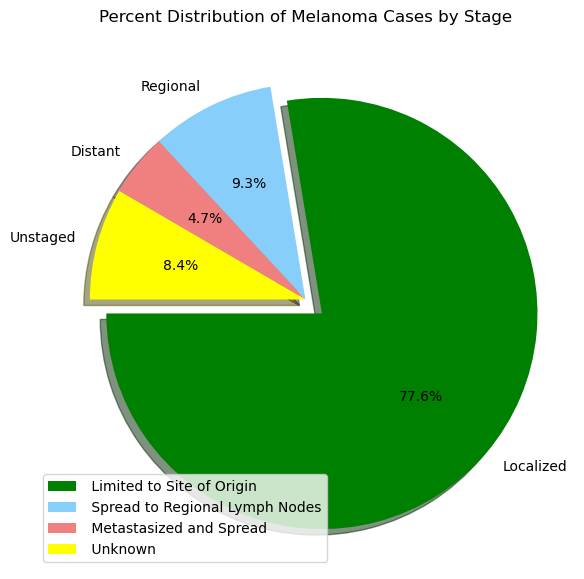

In [472]:
# Create a pie chart from Distribution Data Frame
plt.figure(figsize=(7, 7))
plt.pie(Distribution_df['Percent of cases'], labels=Distribution_df['Unnamed: 0'], colors=colors, explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.title('Percent Distribution of Melanoma Cases by Stage')
#Add a legend
# Custom text to add after each group in the legend
extra_text = [' Limited to Site of Origin', ' Spread to Regional Lymph Nodes', ' Metastasized and Spread', ' Unknown ']
plt.legend(loc="lower left", labels=extra_text)
# Save Image of Melanoma Percent Distribution Pie Chart for Presentation
plt.savefig("Images/Dist_PyPies2.jpg") 
plt.show()


In [473]:
# Age and Occurence of Melanoma

In [474]:
# Create a file path for Rates by Age as a variable
Age = Path("Resources/RatesbyAge.csv")

In [475]:
# Read Data File with Pandas Library
RatesbyAge_df = pd.read_csv(Age)
RatesbyAge_df.head()

,Unnamed: 0,Both Sexes,Unnamed: 2,Unnamed: 3,Female,Unnamed: 5,Unnamed: 6,Male,Unnamed: 8,Unnamed: 9
0,Age at Diagnosis,"Rate per 100,000",Lower 95% C.I.,Upper 95% C.I.,"Rate per 100,000",Lower 95% C.I.,Upper 95% C.I.,"Rate per 100,000",Lower 95% C.I.,Upper 95% C.I.
1,<1,—,—,—,—,—,—,—,—,—
2,1-4,0.1,0.1,0.1,0.1,0.1,0.2,0.1,0,0.1
3,5-9,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
4,10-14,0.2,0.2,0.3,0.3,0.2,0.3,0.2,0.1,0.3


In [476]:
# Clean up and Organize the Data

# Change the Header
Age = Path("Resources/RatesbyAge.csv")
RatesbyAge_df = pd.read_csv(Age, skiprows=1)
RatesbyAge_df.head()

,Age at Diagnosis,"Rate per 100,000",Lower 95% C.I.,Upper 95% C.I.,"Rate per 100,000.1",Lower 95% C.I..1,Upper 95% C.I..1,"Rate per 100,000.2",Lower 95% C.I..2,Upper 95% C.I..2
0,<1,—,—,—,—,—,—,—,—,—
1,1-4,0.1,0.1,0.1,0.1,0.1,0.2,0.1,0,0.1
2,5-9,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
3,10-14,0.2,0.2,0.3,0.3,0.2,0.3,0.2,0.1,0.3
4,15-19,0.8,0.7,0.8,1,0.9,1.1,0.5,0.5,0.6


In [477]:
# Get a list of all of the columns for reference
RatesbyAge_df.columns

Index(['Age at Diagnosis', 'Rate per 100,000', 'Lower 95% C.I.',
       'Upper 95% C.I.', 'Rate per 100,000.1', 'Lower 95% C.I..1',
       'Upper 95% C.I..1', 'Rate per 100,000.2', 'Lower 95% C.I..2',
       'Upper 95% C.I..2'],
      dtype='object')

In [496]:
# Reduce the Columns
RedRatesbyAge_df = RatesbyAge_df.loc[:, ["Age at Diagnosis", "Rate per 100,000", "Rate per 100,000.1", "Rate per 100,000.2"]]
RedRatesbyAge_df.head()

,Age at Diagnosis,"Rate per 100,000","Rate per 100,000.1","Rate per 100,000.2"
0,<1,—,—,—
1,1-4,0.1,0.1,0.1
2,5-9,0.1,0.1,0.1
3,10-14,0.2,0.3,0.2
4,15-19,0.8,1,0.5


In [497]:
column_names = ["Age at Diagnosis", "Both Sexes2 Rate per 100,000", "Female2 Rate per 100,000", "Male2 Rate per 100,000"]
RedRatesbyAge_df.columns = column_names
RedRatesbyAge_df.head()

,Age at Diagnosis,"Both Sexes2 Rate per 100,000","Female2 Rate per 100,000","Male2 Rate per 100,000"
0,<1,—,—,—
1,1-4,0.1,0.1,0.1
2,5-9,0.1,0.1,0.1
3,10-14,0.2,0.3,0.2
4,15-19,0.8,1,0.5


In [498]:
print(RedRatesbyAge_df)


   Age at Diagnosis Both Sexes2 Rate per 100,000 Female2 Rate per 100,000  \
0                <1                            —                        —   
1               1-4                          0.1                      0.1   
2               5-9                          0.1                      0.1   
3             10-14                          0.2                      0.3   
4             15-19                          0.8                        1   
5             20-24                          2.3                      3.3   
6             25-29                          4.6                      6.7   
7             30-34                          8.5                     11.2   
8             35-39                         11.3                       14   
9             40-44                         14.7                       17   
10            45-49                           20                     21.3   
11            50-54                         27.2                     26.2   

<Figure size 640x480 with 0 Axes>

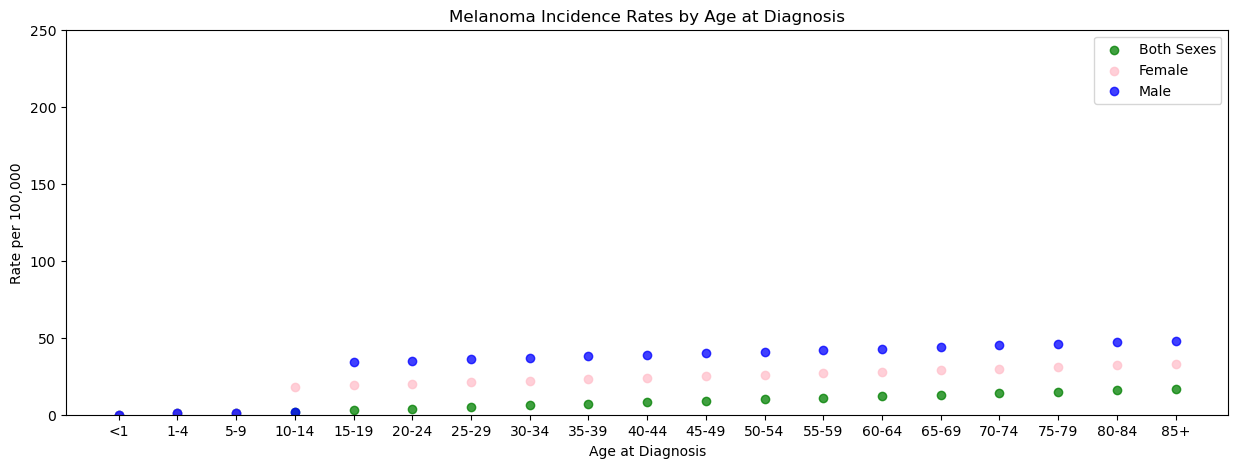

In [499]:
#  Make a Scatter Plot
plt.clf()
x_values = RedRatesbyAge_df["Age at Diagnosis"]
y_Both_Sexes2 = RedRatesbyAge_df["Both Sexes2 Rate per 100,000"]
y_Male = RedRatesbyAge_df["Male2 Rate per 100,000"]
y_Female = RedRatesbyAge_df["Female2 Rate per 100,000"]

plt.figure(figsize=(15, 5))

plt.scatter(x_values, y_Both_Sexes2, marker="o", color="green", label="Both Sexes", alpha=0.75)
plt.scatter(x_values, y_Female, marker="o", color="pink", label="Female", alpha=0.75)
plt.scatter(x_values, y_Male, marker="o", color="blue", label="Male", alpha=0.75)

# Create a title, x label, and y label for our chart
plt.title("Melanoma Incidence Rates by Age at Diagnosis")
plt.xlabel("Age at Diagnosis")
plt.ylabel("Rate per 100,000")

plt.ylim(0, 250)

# Set the y-tick positions and labels
y_ticks = [0, 50, 100, 150, 200, 250]
y_tick_labels = [str(y) for y in y_ticks]
plt.yticks(y_ticks, y_tick_labels)

plt.legend(loc="best")



# Save Image of Melanoma (2016-2020) Age Incidence Rates scatter plot Chart for Presentation
plt.savefig("Images/Age_PyScatter.png")  
plt.show()

In [ ]:
# Print not displaying properly!!!! scale is off and the values are not represented properly

In [2]:
### TERRY CODE ENDS#####

In [3]:
#### AVARY CODE STARTS####

In [4]:
####AVARY CODE ENDS####

In [5]:
##########SOMIN CODE START##########

In [6]:
import os
import csv
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from functools import reduce

In [7]:
#First, the dataset is read and a sub dataset of desired values is created to visualize cancer type vs. cancer costs
#Datasset was pulled from the 2020 Medical Care Costs Associated with Cancer Survivorship in the United States article, published in the journal Cancer Epidemiology, Biomarkers & Prevention
cancer_costs = pd.read_csv('cancer_costs.csv')
initial_cost = cancer_costs[["Cancer Site", "Initial care per patient (medical services)"]]
initial_cost = initial_cost.set_index('Cancer Site')
initial_cost.head()

,Initial care per patient (medical services)
Cancer Site,
Bladder,26442.8
Brain,139813.8
Breast,34979.5
Cervix Uteri,58715.6
Colorectal,66523.5


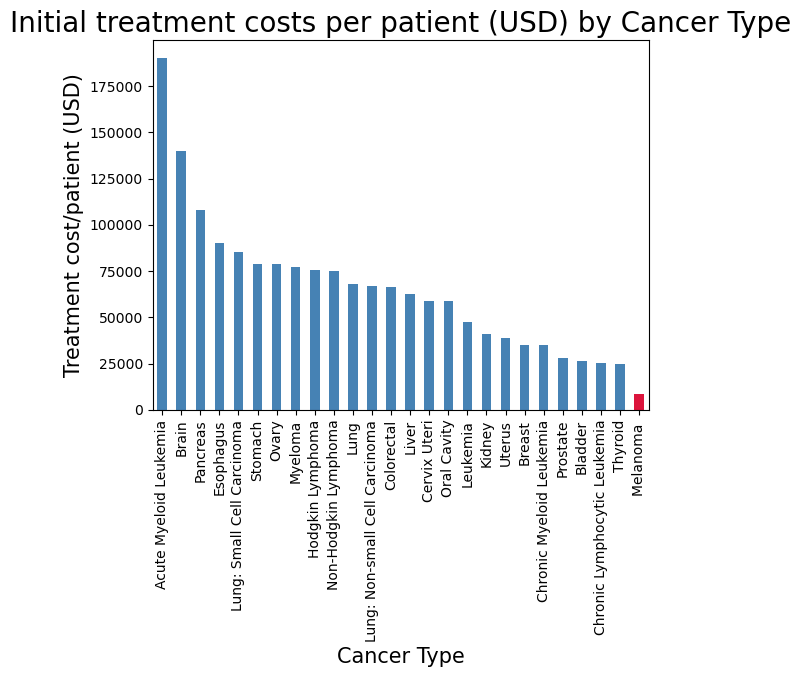

In [8]:
#A bar graph was selected to help visualize the various cancer types and the values are displayed via descending order so that an individual can easily recognize where the cancer of interest, melanoma, falls within the cost spectrum of cancers
initial_cost_sorted = initial_cost.sort_values('Initial care per patient (medical services)', ascending = False)
initial_cost_sorted['Initial care per patient (medical services)'].plot(kind="bar", color=['steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'crimson'])
plt.xlabel("Cancer Type", fontsize="15")
plt.ylabel("Treatment cost/patient (USD)", fontsize="15")
plt.title("Initial treatment costs per patient (USD) by Cancer Type", fontsize="20")
plt.xticks(rotation=90, horizontalalignment="center")
plt.rcParams['figure.figsize'] = [20, 10]

In [9]:
#As shown in the bar graph, melanoma cancer costs are by far the lowest amongst prevelant cancer types, only costing about $8536.70 per patient to receive initial treatment. This contrasts greatly with the most expensive cancer type, acute myeloma, which costs $190305.00 to treat per patient.

In [10]:
#Although this is a relatively less inexpensive cancer type compared to others, how do inicidence and mortality statistics differ between different races, and is there an underlying cause?

In [11]:
#Data pulled from the 2020 CDC Wonder Cancer Database. Data exhibits several repeats of race type due to multiple other criteria such as age ranges, sex, etc. so data has been cleaned to show only the total sum of melanoma incidences for each race population.
melanoma_incidence = pd.read_csv('cancer_incidence.csv')
race_incidence = melanoma_incidence[["Race", "Count"]]
race_incidence = race_incidence.set_index('Race')
race_incidence = race_incidence.groupby(['Race']).sum()
race_incidence.head()

,Count
Race,
American Indian or Alaska Native,3250.0
Asian or Pacific Islander,4113.0
Black or African American,7021.0
Hispanic,28277.0
White,1299040.0


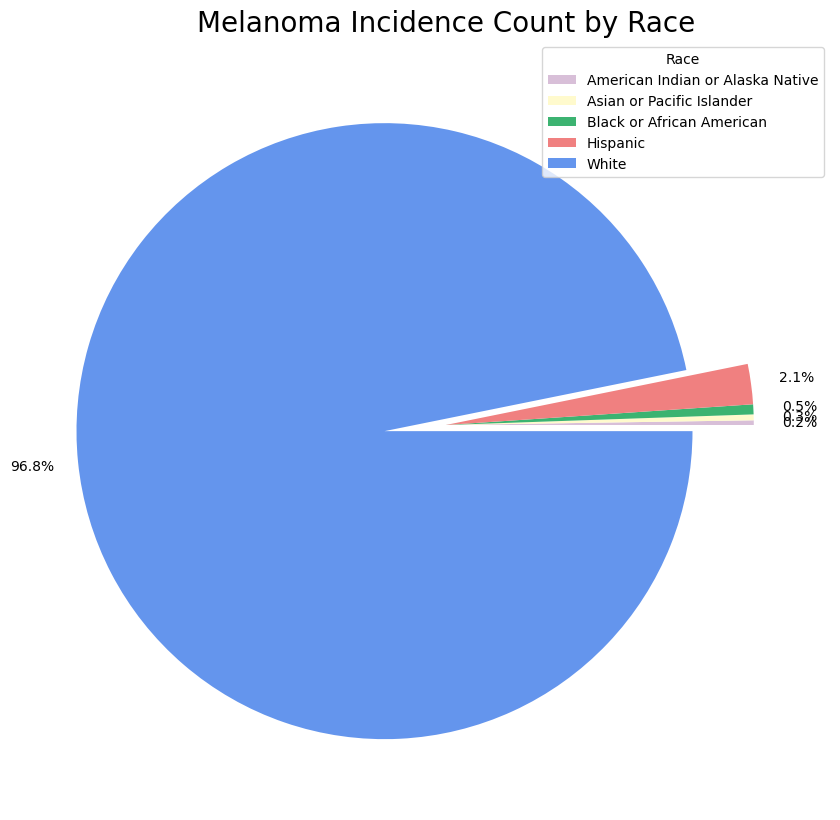

In [12]:
race_iCount = race_incidence["Count"]
mylabels = ["American Indian or Alaska Native", "Asian or Pacific Islander", "Black or African American", "Hispanic", "White"]
mycolors = ["thistle", "lemonchiffon", "mediumseagreen", "lightcoral", "cornflowerblue"]
myexplode = [0, 0, 0, 0, 0.2]
plt.pie(race_iCount, labels = mylabels, labeldistance=None, explode = myexplode, colors = mycolors, autopct='%1.1f%%', pctdistance=1.15)
plt.legend(title = "Race")
plt.title("Melanoma Incidence Count by Race", fontsize="20")
plt.rcParams['figure.figsize'] = [20, 20]
plt.show()

In [13]:
#White predominantly suffer from melanoma, with hispanics, black/african americans, asian/pacific islanders, and american indian/alaska natives following in incidence count.
#We will now continue on to look at mortality counts in melanoma, and determine the mortality-incidence ratio for melanoma

melanoma_mortality = pd.read_csv('cancer_mortality.csv')
race_mortality = melanoma_mortality[["Race", "Deaths"]]
race_mortality = race_mortality.set_index('Race')
race_mortality = race_mortality.groupby(['Race']).sum()
race_mortality.head()

,Deaths
Race,
American Indian or Alaska Native,287.0
Asian or Pacific Islander,921.0
Black or African American,2554.0
Hispanic,4158.0
White,168014.0


In [14]:
#Merge indcidence and mortality sub tables by race to then produce an incidence-mortality ratio
race_mi = reduce(lambda x,y: pd.merge(x,y, on='Race', how='outer'), [race_incidence, race_mortality])
race_mi['Incidence-mortality ratio'] = race_mi['Deaths'] / race_mi['Count']
race_mi.head()

,Count,Deaths,Incidence-mortality ratio
Race,,,
American Indian or Alaska Native,3250.0,287.0,0.088308
Asian or Pacific Islander,4113.0,921.0,0.223924
Black or African American,7021.0,2554.0,0.363766
Hispanic,28277.0,4158.0,0.147045
White,1299040.0,168014.0,0.129337


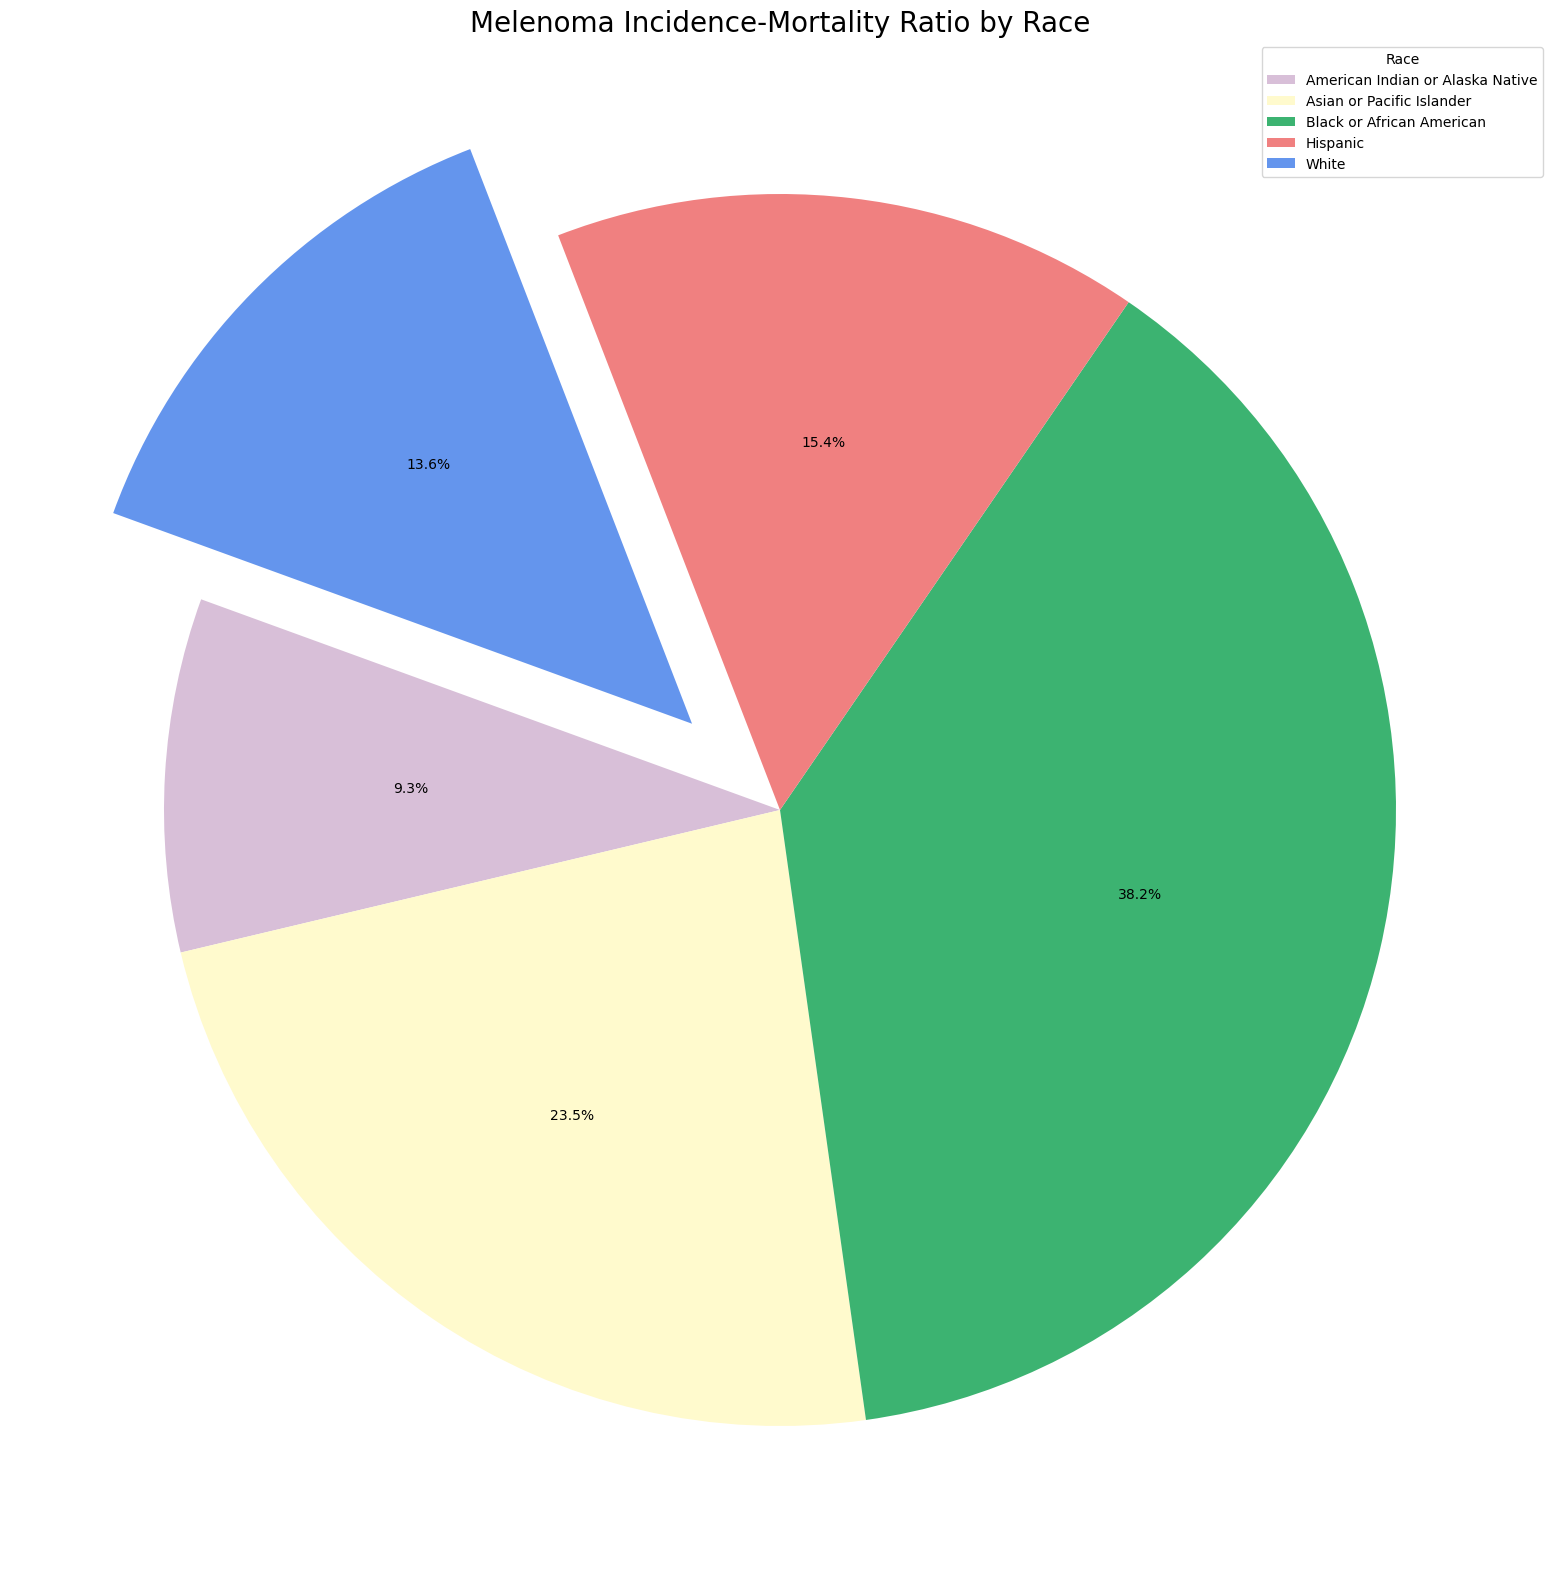

In [15]:
#Pie chart displaying incidence-mortality rates amongst different race populations
race_ratio = race_mi["Incidence-mortality ratio"]
mylabels = ["American Indian or Alaska Native", "Asian or Pacific Islander", "Black or African American", "Hispanic", "White"]
mycolors = ["thistle", "lemonchiffon", "mediumseagreen", "lightcoral", "cornflowerblue"]
myexplode = [0, 0, 0, 0, 0.2]
plt.pie(race_ratio, labels = mylabels, labeldistance=None, explode = myexplode, colors = mycolors, startangle = 160,  autopct='%1.1f%%')
plt.legend(title = "Race")
plt.title("Melenoma Incidence-Mortality Ratio by Race", fontsize="20")
plt.rcParams['figure.figsize'] = [15, 15]
plt.show()

In [16]:
#Even though whites were the most heavily effected population in terms of incidence melanoma, whites do not have the highest incidence mortality rate. Blacks, asians and hispanics hold the highest inicidence-mortality rates amongst the analyzed populations.

In [17]:
#Why is there this disparity in incidence-mortality rates? I thought that it could perhaps be due to differences in SES amongst different races, so I pulled a dataset from the US census bureau looking at annual household income by various household characteristics. For this case, I will focus on the race characteristic by household income.
income_stats = pd.read_csv('race_income.csv')
race_income = income_stats[["Characteristic", "Median Income (dollars)"]]
race_income.head()

,Characteristic,Median Income (dollars)
0,All households,67521.0
1,Family households,86372.0
2,Married-couple,101517.0
3,"Female householder, no spouse present",49214.0
4,"Male householder, no spouse present",67304.0


In [18]:
#Selected data for race only
income = race_income[race_income["Characteristic"].isin(['White', 'Black', 'Asian', 'Hispanic'])]

#Rename rows such that I can combine data with previous dataset on incidence mortality
income_copy = income.copy()
income_copy.rename(columns={'Characteristic': 'Race'}, inplace=True)
income_copy = income_copy.set_index('Race')
income_copy.rename(index={'Black': 'Black or African American'}, inplace=True)
income_copy.rename(index={'Asian': 'Asian or Pacific Islander'}, inplace=True)
income_copy.head()

,Median Income (dollars)
Race,
White,74912.0
Black or African American,45870.0
Asian or Pacific Islander,94903.0
Hispanic,55321.0


In [19]:
#Combine income and incidence mortality rate by race
income_mi = reduce(lambda x,y: pd.merge(x,y, on='Race', how='outer'), [race_mi, income_copy])

income_mi = income_mi[["Incidence-mortality ratio", "Median Income (dollars)"]]
income_mi = income_mi.drop("American Indian or Alaska Native")

income_mi.head()


,Incidence-mortality ratio,Median Income (dollars)
Race,,
Asian or Pacific Islander,0.223924,94903.0
Black or African American,0.363766,45870.0
Hispanic,0.147045,55321.0
White,0.129337,74912.0


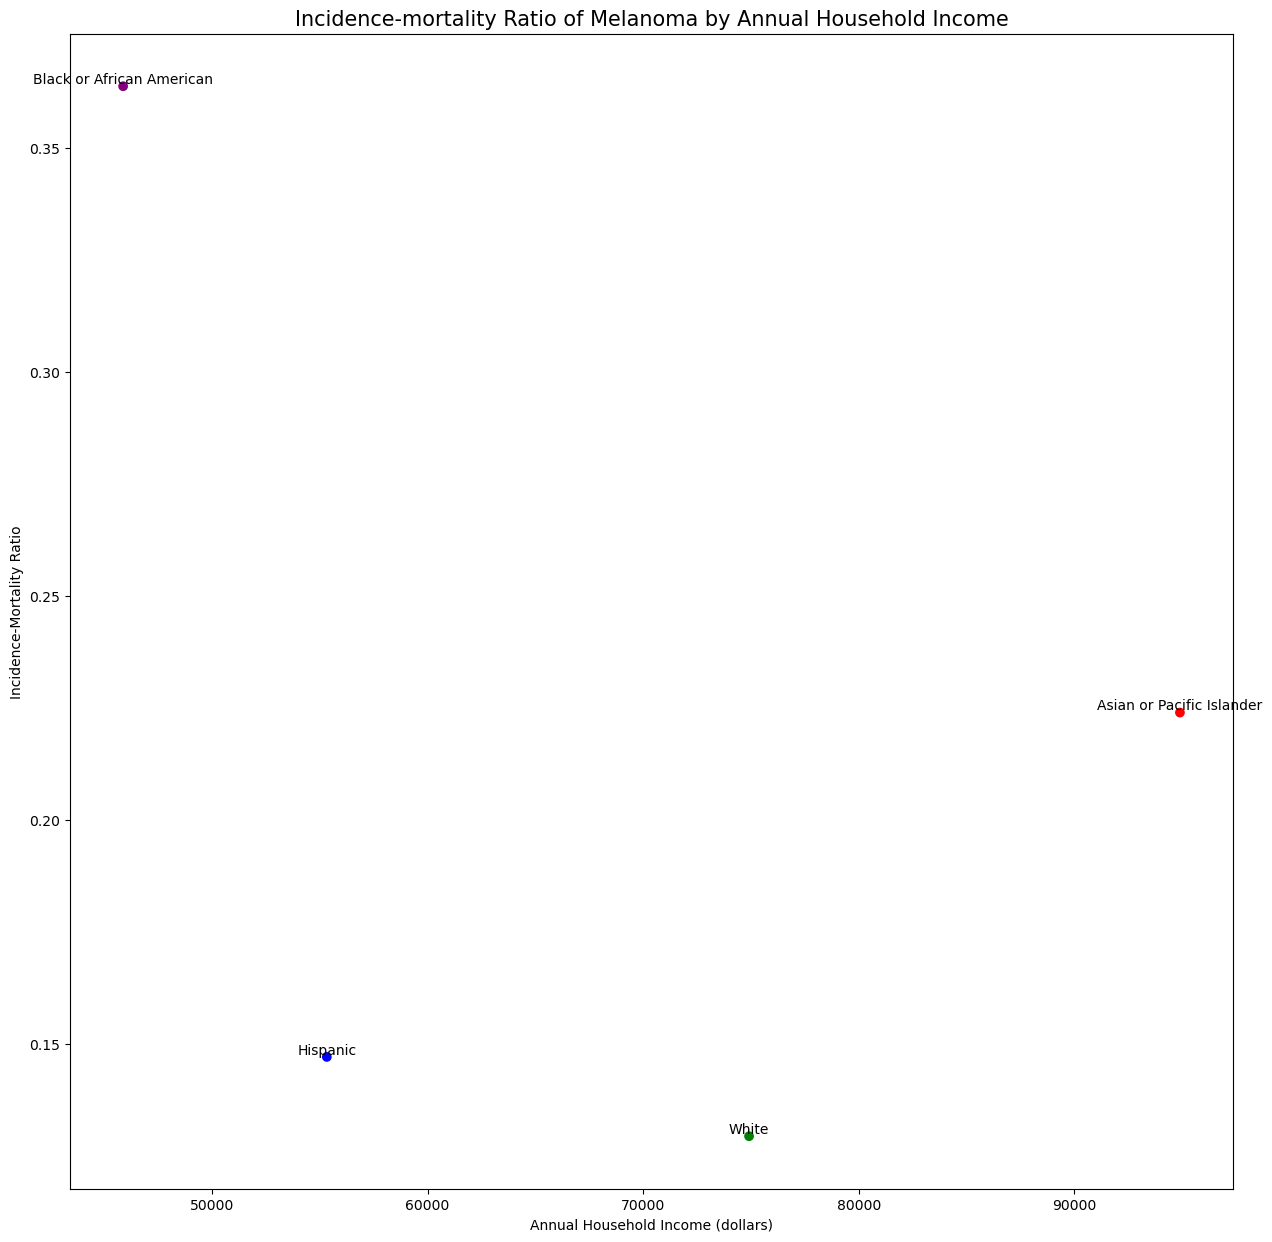

In [20]:
#Create a scatterplot to visualize possible correlation between income and incidence-mortality ratio
income_sorted = income_mi.sort_values('Median Income (dollars)', ascending = False)

colors = np.array(["red","green","blue","purple"])
plt.scatter('Median Income (dollars)', 'Incidence-mortality ratio', data=income_sorted, c=colors);
plt.rcParams['figure.figsize'] = [5, 2.5]
plt.title("Incidence-mortality Ratio of Melanoma by Annual Household Income", fontsize="15")
plt.xlabel('Annual Household Income (dollars)')
plt.ylabel('Incidence-Mortality Ratio')

plt.text(94903, 0.223924, 'Asian or Pacific Islander', va='bottom', ha='center')
plt.text(45870, 0.363766, 'Black or African American', va='bottom', ha='center')
plt.text(55321, 0.147045, 'Hispanic', va='bottom', ha='center')
plt.text(74912, 0.129337, 'White', va='bottom', ha='center')

plt.show()

In [21]:
#My initial hypothesis wasn't entirely correct--I hypothesized that there was a inverse correlation between annual household income and the incidence-mortality ratio for melanoma such that as household income decreases, incidence-mortality ratio increases. With the exception of Asians, there is an inverse correlation between the two variables, but further investigation must be conducted to discover why asians, despite their high income household and ability to pay for treatment, have a high incidence-mortality ratio. 
#While it could be true that Blacks and African Americans have the highest incidence-mortality rate of all races due to their low household-income, it cannot be said that just by having a high annual income one will have a low incidence-mortality ratio, as exhibited by the Asian population above. 

In [22]:
#In conclusion, while melanoma treatment costs are relatively low in comparison to other cancers, race groups are disproportionately affected by melanoma, with Whites having the highest incidence counts. However, they have one of the lowest incidence-mortality ratios, suggesting that there is a confounding variable that helps or harms survival chances of various race populations. While social economic status can be a potential factor, it is not a sole or primary driver in mortality/survival rates amongst melanoma patients. 

In [23]:
##########SOMIN CODE END##########

In [24]:
### ISHA CODE START###

In [25]:
#Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import pathlib as Path

# Study data files
melanomaData = pd.read_csv("Data/Melanoma Cancer Statistics, 1999-2019 Incidence.csv")
stateData = pd.read_csv("Data/model_state.csv")
stateYearData = pd.read_csv("Data/climdiv_state_year.csv")
latlongData = pd.read_csv("Data/world_country_and_usa_states_latitude_and_longitude_values.csv")

# Merge the weather data into one DataFrame
weatherData = pd.merge(stateData, stateYearData, how = "left", on = ["fips"])
weatherlatlong = pd.merge(weatherData, latlongData, how = "left", on = ["State", "State Code"])

#Take the state code out of the Melanoma data
melanomaData = melanomaData.drop(columns=['State Code', 'Year Code'])

In [26]:
#Take out the uneeded columns, create a new weather data frame
cleanWeather = weatherlatlong.drop(columns=["Fall","Spring","index_x","Summer","Winter","max_warming_season","country_code","country", "STATENS", "index_y", "latitude","longitude", 'fips'])
cleanWeather = cleanWeather.loc[cleanWeather["year"]>1998].rename(columns={"year":"Year"})

In [27]:
cleanWeather.head()

,Annual,State Code,State,Year,temp,tempc,usa_state_latitude,usa_state_longitude
104,-0.035048,AL,Alabama,1999,64.141667,17.856481,32.318231,-86.902298
105,-0.035048,AL,Alabama,2000,63.566667,17.537037,32.318231,-86.902298
106,-0.035048,AL,Alabama,2001,63.033333,17.240741,32.318231,-86.902298
107,-0.035048,AL,Alabama,2002,63.575000,17.541667,32.318231,-86.902298
108,-0.035048,AL,Alabama,2003,62.733333,17.074074,32.318231,-86.902298


In [28]:
#Merge the Melanoma Data with the weather data
# We want to get the incidence of Melanoma by location
melanomaWeather = pd.merge(melanomaData, cleanWeather, how = "left", on = ["State", "Year"])

In [29]:
melanomaWeather.head()

,Notes,Cancer Sites,Cancer Sites Code,Sex,Sex Code,Year,Region,Region Code,State,Count,Annual,State Code,temp,tempc,usa_state_latitude,usa_state_longitude
0,NaN,Melanoma of the Skin,25010,Female,F,1999,Northeast,CENS-R1,Connecticut,326,1.801492,CT,50.850000,10.472222,41.603221,-73.087749
1,NaN,Melanoma of the Skin,25010,Female,F,1999,Northeast,CENS-R1,Maine,122,1.744621,ME,43.800000,6.555556,45.253783,-69.445469
2,NaN,Melanoma of the Skin,25010,Female,F,1999,Northeast,CENS-R1,Massachusetts,498,1.700653,MA,49.783333,9.879630,42.407211,-71.382437
3,NaN,Melanoma of the Skin,25010,Female,F,1999,Northeast,CENS-R1,New Hampshire,124,1.622430,NH,45.391667,7.439815,43.193852,-71.572395
4,NaN,Melanoma of the Skin,25010,Female,F,1999,Northeast,CENS-R1,Rhode Island,81,2.038868,RI,51.750000,10.972222,41.580095,-71.477429


In [31]:
#Clean up the DataFrame combining the Melanoma data and weather data in a new DataFrame
cleanMelanomaWeather = melanomaWeather.drop(columns=['Notes','Region','Region Code','Sex Code']).dropna()

In [32]:
cleanMelanomaWeather.head()

,Cancer Sites,Cancer Sites Code,Sex,Year,State,Count,Annual,State Code,temp,tempc,usa_state_latitude,usa_state_longitude
0,Melanoma of the Skin,25010,Female,1999,Connecticut,326,1.801492,CT,50.850000,10.472222,41.603221,-73.087749
1,Melanoma of the Skin,25010,Female,1999,Maine,122,1.744621,ME,43.800000,6.555556,45.253783,-69.445469
2,Melanoma of the Skin,25010,Female,1999,Massachusetts,498,1.700653,MA,49.783333,9.879630,42.407211,-71.382437
3,Melanoma of the Skin,25010,Female,1999,New Hampshire,124,1.622430,NH,45.391667,7.439815,43.193852,-71.572395
4,Melanoma of the Skin,25010,Female,1999,Rhode Island,81,2.038868,RI,51.750000,10.972222,41.580095,-71.477429


In [33]:
#Find the results for 1999
melanoma1999 = cleanMelanomaWeather.loc[cleanMelanomaWeather["Year"]==1999]

y = -1.5x + 112.48
Correlation Coefficient is -0.9486178940065155
R-squared is 0.8998759088293568


/var/folders/24/hvyfpl3j34q01pwchrb67tj80000gp/T/ipykernel_1261/438336021.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  averages1999 = melanoma1999.groupby('State').mean()


Text(0.5, 1.0, 'Temperatures by USA Latitudes in 1999')

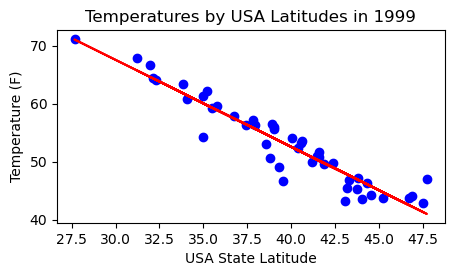

In [34]:
#Create a scatter plot of the Latidude versus the Temperature
averages1999 = melanoma1999.groupby('State').mean()

x, y = averages1999["usa_state_latitude"], averages1999["temp"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress = x * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line)
r = np.corrcoef(x, y)
rSquared = r*r
print("Correlation Coefficient is " + str(r[0][1]))
print("R-squared is " + str(rSquared[0][1]))


fig1, ax1 = plt.subplots()
markersize = 5

plt.scatter(x, y, color = "blue")
plt.plot(x,regress,"r-")

plt.ylabel("Temperature (F)")
plt.xlabel("USA State Latitude")
plt.title('Temperatures by USA Latitudes in 1999')

y = -25.99x + 1472.06
Correlation Coefficient is -0.25579963641022196
R-squared is 0.06543345398760175


Text(0.5, 1.0, 'Incidences of Melanoma by USA Latitudes in 1999')

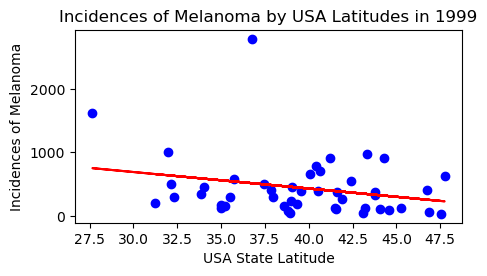

In [35]:
#Create a scatter plot of the Latidude versus the incidence of Melanoma
x1, y1 = averages1999["usa_state_latitude"], averages1999["Count"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x1, y1)
regress = x1 * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line)
r = np.corrcoef(x1, y1)
rSquared = r*r
print("Correlation Coefficient is " + str(r[0][1]))
print("R-squared is " + str(rSquared[0][1]))

fig2, ax2 = plt.subplots()
markersize = 5

plt.scatter(x1, y1, color = "blue")
plt.plot(x1,regress,"r-")

plt.ylabel("Incidences of Melanoma")
plt.xlabel("USA State Latitude")
plt.title('Incidences of Melanoma by USA Latitudes in 1999')

In [36]:
#Find the results for 2019
melanoma2019 = cleanMelanomaWeather.loc[cleanMelanomaWeather["Year"]==2019]

y = -1.77x + 122.29
Correlation Coefficient is -0.9536194619422884
R-squared is 0.9093900781950996


/var/folders/24/hvyfpl3j34q01pwchrb67tj80000gp/T/ipykernel_1261/1288420359.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  averages2019 = melanoma2019.groupby('State').mean()


Text(0.5, 1.0, 'Temperatures by USA Latitudes in 2019')

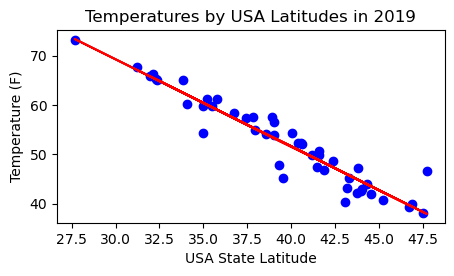

In [37]:
#Create a scatter plot of the Latidude versus the Temperature
averages2019 = melanoma2019.groupby('State').mean()

x, y = averages2019["usa_state_latitude"], averages2019["temp"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress = x * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line)
r = np.corrcoef(x, y)
rSquared = r*r
print("Correlation Coefficient is " + str(r[0][1]))
print("R-squared is " + str(rSquared[0][1]))


fig1, ax1 = plt.subplots()
markersize = 5

plt.scatter(x, y, color = "blue")
plt.plot(x,regress,"r-")

plt.ylabel("Temperature (F)")
plt.xlabel("USA State Latitude")
plt.title('Temperatures by USA Latitudes in 2019')

y = -64.84x + 3491.09
Correlation Coefficient is -0.3256846971959199
R-squared is 0.10607052198759805


Text(0.5, 1.0, 'Incidences of Melanoma by USA Latitudes in 2019')

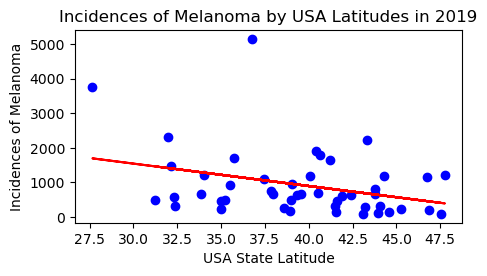

In [38]:
#Create a scatter plot of the Latidude versus the incidence of Melanoma
x1, y1 = averages2019["usa_state_latitude"], averages2019["Count"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x1, y1)
regress = x1 * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line)
r = np.corrcoef(x1, y1)
rSquared = r*r
print("Correlation Coefficient is " + str(r[0][1]))
print("R-squared is " + str(rSquared[0][1]))

fig2, ax2 = plt.subplots()
markersize = 5

plt.scatter(x1, y1, color = "blue")
plt.plot(x1,regress,"r-")

plt.ylabel("Incidences of Melanoma")
plt.xlabel("USA State Latitude")
plt.title('Incidences of Melanoma by USA Latitudes in 2019')

In [39]:
clean1999 = averages1999.drop(columns= ["Cancer Sites Code",'Year','Annual','temp','tempc','usa_state_longitude'])
clean2019 = averages2019.drop(columns= ["Cancer Sites Code",'Year','Annual','temp','tempc','usa_state_longitude'])

In [40]:
#INDEPENDENT T-TEST 
st.ttest_ind(clean1999, clean2019, equal_var=False)
#Null hypothesis: The means for the two populations are equal. Alternative hypothesis: The means for the two populations are not equal.
#A statistically significant test result (P ≤ 0.05) means that the test hypothesis is false or should be rejected.
#If your p-value is less than or equal to 0.05 (the significance level), you would conclude that your result is statistically significant. This means the evidence is strong enough to reject the null hypothesis in favor of the alternative hypothesis.

#SINCE THE P-VALUE FOR THE INCIDENCES OF MELANOMA IS <= 0.05 WE CAN REJECT THAT 1999 AND 2019 HAVE THE SAME 
#NUMBER OF INCIDENCES OF MELANOMA

Ttest_indResult(statistic=array([-3.10501046,  0.04365048]), pvalue=array([0.00277553, 0.96527865]))

In [41]:
#CONCLUDE THAT THERE IS LIKELY AN INCREASE IN MELANOMA INCIDENCE BETWEEN 1999 AND 2019, BUT WE DO NOT HAVE THE 
#DATA TO SUPPORT THAT THIS IS DUE TO LATITUDE

In [ ]:
###ISHA CODE END###